In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

# Set huggingface dir
# os.environ["HF_HOME"] = ""

In [3]:
import torch
import random
import numpy as np

from PIL import Image
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler

In [4]:
stable_diff_version = "stabilityai/stable-diffusion-2-base"
clip_version = "laion/CLIP-ViT-H-14-laion2B-s32B-b79K"

device = "cuda"

seed = 42

In [5]:
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

## Image generation

In [6]:
generator = DiffusionPipeline.from_pretrained(stable_diff_version)
generator.scheduler = DPMSolverMultistepScheduler.from_config(generator.scheduler.config)

model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/738 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/716 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [7]:
generator = generator.to(device)

In [8]:
# complex_prompt = "painting of hybrid dragon and frog fused together, intercrossed animal, by zdzislaw beksinski, by lewis jones, by mattias adolfsson, cold hue's, warm tone gradient background, concept art, digital painting"
squirrel_prompt = "A picture of a fat squirrel on a tree branch, high definition"

In [9]:
image = generator(squirrel_prompt, num_inference_steps=100).images[0]
# image = generator(complex_prompt, num_inference_steps=150).images[0]

  0%|          | 0/100 [00:00<?, ?it/s]

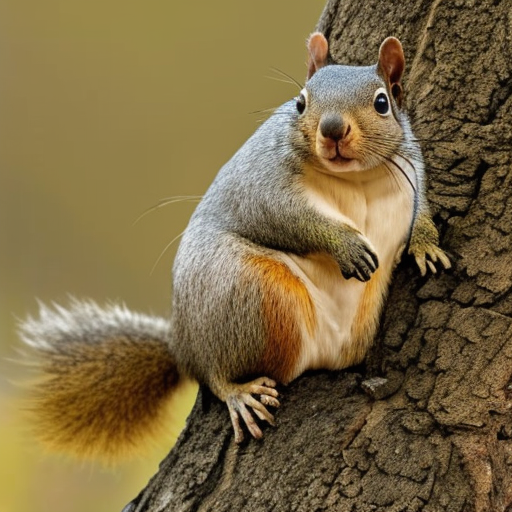

In [10]:
image

In [11]:
image.save("res/squirrel.png")
# image.save("res/complex.png")